MODELO PREDITIVO DE AÇÕES
    Desenvolvendo um modelo de Machine Learning para prever ações financeiras

In [2]:
# Importando a biblioteca do YahooFinance para baixar as cotações
import yfinance as yF
from requests.packages import target

In [3]:
# Importando o pandas para a manipulação de dados
import pandas as pd

In [4]:
# Importando para visualização de dados
import matplotlib.pyplot as plt
%matplotlib inline

# Importando os pacortes para o modelo preditivo
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [6]:

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Carrega o dataset
Cotacoes = yF.Ticker("ITSA4.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="5y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-26 00:00:00-03:00,5.49,5.55,5.42,5.53,30386718,0.00,0.00
2020-10-27 00:00:00-03:00,5.58,5.62,5.35,5.37,40991967,0.00,0.00
2020-10-28 00:00:00-03:00,5.23,5.28,5.11,5.12,42713068,0.00,0.00
2020-10-29 00:00:00-03:00,5.11,5.16,4.97,5.15,46922533,0.00,0.00
2020-10-30 00:00:00-03:00,5.11,5.15,5.03,5.07,42183144,0.00,0.00


In [8]:
# Retirar o índice do campo data
dados.reset_index(inplace=True)
dados.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-10-26 00:00:00-03:00,5.49,5.55,5.42,5.53,30386718,0.00,0.00
1,2020-10-27 00:00:00-03:00,5.58,5.62,5.35,5.37,40991967,0.00,0.00
2,2020-10-28 00:00:00-03:00,5.23,5.28,5.11,5.12,42713068,0.00,0.00
3,2020-10-29 00:00:00-03:00,5.11,5.16,4.97,5.15,46922533,0.00,0.00
4,2020-10-30 00:00:00-03:00,5.11,5.15,5.03,5.07,42183144,0.00,0.00


In [9]:
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1241,2025-10-20 00:00:00-03:00,11.01,11.28,11.00,11.23,29530100,0.00,0.00
1242,2025-10-21 00:00:00-03:00,11.22,11.28,11.12,11.12,16744900,0.00,0.00
1243,2025-10-22 00:00:00-03:00,11.13,11.24,11.11,11.24,20856400,0.00,0.00
1244,2025-10-23 00:00:00-03:00,11.28,11.33,11.16,11.24,11464400,0.00,0.00
1245,2025-10-24 00:00:00-03:00,11.30,11.38,11.25,11.28,11243000,0.00,0.00


In [10]:
dados.drop(dados.tail(1).index, inplace=True)
dados.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1240,2025-10-17 00:00:00-03:00,10.92,11.05,10.88,11.00,22008100,0.00,0.00
1241,2025-10-20 00:00:00-03:00,11.01,11.28,11.00,11.23,29530100,0.00,0.00
1242,2025-10-21 00:00:00-03:00,11.22,11.28,11.12,11.12,16744900,0.00,0.00
1243,2025-10-22 00:00:00-03:00,11.13,11.24,11.11,11.24,20856400,0.00,0.00
1244,2025-10-23 00:00:00-03:00,11.28,11.33,11.16,11.24,11464400,0.00,0.00


In [11]:
# Excluindo as colunas que não serão utilizadas e renomear os campos
dados.drop("Dividends", axis=1, inplace=True)
dados.drop("Stock Splits", axis=1, inplace=True)
dados.columns = ["Data", "Abertura", "Maximo", "Minimo", "Fechamento", "Volume"]
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-10-26 00:00:00-03:00,5.49,5.55,5.42,5.53,30386718
1,2020-10-27 00:00:00-03:00,5.58,5.62,5.35,5.37,40991967
2,2020-10-28 00:00:00-03:00,5.23,5.28,5.11,5.12,42713068
3,2020-10-29 00:00:00-03:00,5.11,5.16,4.97,5.15,46922533
4,2020-10-30 00:00:00-03:00,5.11,5.15,5.03,5.07,42183144


In [12]:
# Observando o range de dados
print('Menor data: ', dados['Data'].min())
print('Maior data: ', dados['Data'].max())

Menor data:  2020-10-26 00:00:00-03:00
Maior data:  2025-10-23 00:00:00-03:00


In [13]:
# Dados referente a última data do conjunto de dados
display(dados.loc[dados.index.max()])

Data          2025-10-23 00:00:00-03:00
Abertura                          11.28
Maximo                            11.33
Minimo                            11.16
Fechamento                        11.24
Volume                         11464400
Name: 1244, dtype: object

In [14]:
# Tipos de dados
dados.dtypes

Data          datetime64[ns, America/Sao_Paulo]
Abertura                                float64
Maximo                                  float64
Minimo                                  float64
Fechamento                              float64
Volume                                    int64
dtype: object

In [15]:
# Volume dos dados
dados.shape

(1245, 6)

In [16]:
# Sumário dos dados
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume
count,1245.00,1245.00,1245.00,1245.00,1245.00
mean,7.39,7.47,7.32,7.40,29181996.86
std,1.63,1.64,1.63,1.64,14313621.06
min,5.10,5.15,4.97,5.07,5748500.00
25%,6.07,6.16,5.99,6.07,18911100.00
50%,6.71,6.78,6.63,6.70,26117000.00
75%,8.60,8.66,8.51,8.60,35524956.00
max,11.55,11.64,11.46,11.47,101885778.00


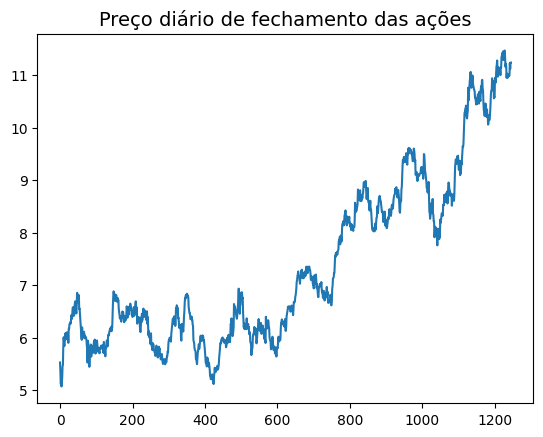

In [17]:
# Plot
plt.plot(dados['Fechamento'])
plt.title('Preço diário de fechamento das ações', size=14)
plt.show()

In [18]:
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-10-26 00:00:00-03:00,5.49,5.55,5.42,5.53,30386718
1,2020-10-27 00:00:00-03:00,5.58,5.62,5.35,5.37,40991967
2,2020-10-28 00:00:00-03:00,5.23,5.28,5.11,5.12,42713068
3,2020-10-29 00:00:00-03:00,5.11,5.16,4.97,5.15,46922533
4,2020-10-30 00:00:00-03:00,5.11,5.15,5.03,5.07,42183144


In [19]:
dados.columns = ["Data", "Abertura", "Maximo", "Minimo", "Fechamento", "Volume"]
dados.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-10-26 00:00:00-03:00,5.49,5.55,5.42,5.53,30386718
1,2020-10-27 00:00:00-03:00,5.58,5.62,5.35,5.37,40991967
2,2020-10-28 00:00:00-03:00,5.23,5.28,5.11,5.12,42713068
3,2020-10-29 00:00:00-03:00,5.11,5.16,4.97,5.15,46922533
4,2020-10-30 00:00:00-03:00,5.11,5.15,5.03,5.07,42183144


In [20]:
# Criando novos campos de Média Móvel com 5 dias, 14 dias e 21 dias
dados['mm5d'] = dados['Fechamento'].rolling(5).mean()
dados['mm14d'] = dados['Fechamento'].rolling(14).mean()
dados['mm21d'] = dados['Fechamento'].rolling(21).mean()

In [21]:
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2020-10-26 00:00:00-03:00,5.49,5.55,5.42,5.53,30386718,NaN,NaN,NaN
1,2020-10-27 00:00:00-03:00,5.58,5.62,5.35,5.37,40991967,NaN,NaN,NaN
2,2020-10-28 00:00:00-03:00,5.23,5.28,5.11,5.12,42713068,NaN,NaN,NaN
3,2020-10-29 00:00:00-03:00,5.11,5.16,4.97,5.15,46922533,NaN,NaN,NaN
4,2020-10-30 00:00:00-03:00,5.11,5.15,5.03,5.07,42183144,5.25,NaN,NaN
5,2020-11-03 00:00:00-03:00,5.12,5.20,5.08,5.12,37647336,5.16,NaN,NaN
6,2020-11-04 00:00:00-03:00,5.38,5.39,5.20,5.24,78370506,5.14,NaN,NaN
7,2020-11-05 00:00:00-03:00,5.33,5.50,5.31,5.45,78680864,5.21,NaN,NaN
8,2020-11-06 00:00:00-03:00,5.43,5.51,5.41,5.48,25506025,5.27,NaN,NaN
9,2020-11-09 00:00:00-03:00,5.74,5.89,5.64,5.82,96849928,5.42,NaN,NaN


In [22]:
dados['Fechamento'] = dados['Fechamento'].shift(-1)
dados.head(30)

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,mm5d,mm14d,mm21d
0,2020-10-26 00:00:00-03:00,5.49,5.55,5.42,5.37,30386718,NaN,NaN,NaN
1,2020-10-27 00:00:00-03:00,5.58,5.62,5.35,5.12,40991967,NaN,NaN,NaN
2,2020-10-28 00:00:00-03:00,5.23,5.28,5.11,5.15,42713068,NaN,NaN,NaN
3,2020-10-29 00:00:00-03:00,5.11,5.16,4.97,5.07,46922533,NaN,NaN,NaN
4,2020-10-30 00:00:00-03:00,5.11,5.15,5.03,5.12,42183144,5.25,NaN,NaN
5,2020-11-03 00:00:00-03:00,5.12,5.20,5.08,5.24,37647336,5.16,NaN,NaN
6,2020-11-04 00:00:00-03:00,5.38,5.39,5.20,5.45,78370506,5.14,NaN,NaN
7,2020-11-05 00:00:00-03:00,5.33,5.50,5.31,5.48,78680864,5.21,NaN,NaN
8,2020-11-06 00:00:00-03:00,5.43,5.51,5.41,5.82,25506025,5.27,NaN,NaN
9,2020-11-09 00:00:00-03:00,5.74,5.89,5.64,6.01,96849928,5.42,NaN,NaN


In [23]:
dados.dropna(inplace=True)

In [24]:
dados.shape

(1224, 9)

In [25]:
qtd_linhas = len(dados)
qtd_linhas_treino = qtd_linhas - 400
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (

    f" linhas treino = 0:{qtd_linhas_treino}"
        f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = {qtd_linhas_teste}: {qtd_linhas}"
)
print(info)

 linhas treino = 0:824 linhas teste = 0:824:1204 linhas validacao = 1204: 1224


In [26]:
# Separando variáveis PREDITORAS e variáveis ALVO
preditoras = dados.drop(['Data', 'Fechamento', 'Volume'], axis=1)
target = dados['Fechamento']

In [27]:
preditoras.head()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
20,6.08,6.11,5.98,6.01,5.90,5.68
21,5.97,5.99,5.90,6.01,5.94,5.70
22,6.01,6.17,5.99,6.02,5.98,5.73
23,6.06,6.08,5.90,6.01,5.99,5.77
24,6.01,6.22,5.98,6.02,6.00,5.82


In [28]:
preditoras.tail()

,Abertura,Maximo,Minimo,mm5d,mm14d,mm21d
1239,10.96,11.10,10.88,10.99,11.12,11.20
1240,10.92,11.05,10.88,11.00,11.09,11.19
1241,11.01,11.28,11.00,11.05,11.07,11.18
1242,11.22,11.28,11.12,11.07,11.06,11.17
1243,11.13,11.24,11.11,11.11,11.06,11.16


In [29]:
# Normalizando os dados
scaler = MinMaxScaler().fit(preditoras)
preditoras_normalizadas = scaler.transform(preditoras)

In [30]:
# Verificando a normalização realizada
print('Preditoras', preditoras_normalizadas.shape)
print(preditoras_normalizadas)

Preditoras (1224, 6)
[[0.15292022 0.14684202 0.14860441 0.13327455 0.10886177 0.0652418 ]
 [0.13563633 0.1287693  0.13560021 0.13345386 0.11493579 0.06880236]
 [0.14168567 0.15630891 0.14947144 0.13614348 0.12172822 0.07432123]
 ...
 [0.91631564 0.9444414  0.92848587 0.94340806 0.9563142  0.98715028]
 [0.94885956 0.9444414  0.94714171 0.94694504 0.95420603 0.98571366]
 [0.93491215 0.93826824 0.94558702 0.95434056 0.95514299 0.98403761]]


In [31]:
# Separando os dados para treino e para teste
X_Train = preditoras_normalizadas[:qtd_linhas_treino]
X_test = preditoras_normalizadas[qtd_linhas_treino:qtd_linhas_teste]

Y_Train = target[:qtd_linhas_treino]
Y_test = target[qtd_linhas_treino:qtd_linhas_teste]

print(len(X_Train), len(Y_Train))
print(len(X_test), len(Y_test))

# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train)
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)
print(f'Coeficiente de determinação: {cd * 100:.2f}%')


824 824
380 380
Coeficiente de determinação: 98.55%


In [33]:
# Treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_Train, Y_Train)
predicao = lr.predict(X_test)
cd = r2_score(Y_test, predicao)
print(f'Coeficiente de determinação: {cd * 100:.2f}%')

# Quanto mais próximo de 1 melhor

Coeficiente de determinação: 98.55%


In [35]:
# Treinamento usando regressão linear com MLP
rn = MLPRegressor(max_iter=2000, random_state=42)
rn.fit(X_Train, Y_Train)

predicao = rn.predict(X_test)

cd = r2_score(Y_test, predicao)
print(f'Coeficiente de determinação: {cd * 100:.2f}%')



Coeficiente de determinação: 92.14%


In [40]:
# Executando a previsão
previsao = preditoras_normalizadas[qtd_linhas_teste:qtd_linhas]
data_pregao_full = dados['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = dados['Fechamento']
res = res_full[qtd_linhas_teste:qtd_linhas]

pred = lr.predict(previsao)

df = pd.DataFrame({'Data_Pregão':data_pregao, 'Real': res, 'Previsão': pred})

df.set_index('Data_Pregão', inplace=True)

df

,Real,Previsão
Data_Pregão,,
2025-09-25 00:00:00-03:00,11.38,11.33
2025-09-26 00:00:00-03:00,11.46,11.36
2025-09-29 00:00:00-03:00,11.47,11.55
2025-09-30 00:00:00-03:00,11.30,11.53
2025-10-01 00:00:00-03:00,11.16,11.36
2025-10-02 00:00:00-03:00,11.22,11.24
2025-10-03 00:00:00-03:00,11.17,11.20
2025-10-06 00:00:00-03:00,10.95,11.15
2025-10-07 00:00:00-03:00,11.03,11.00


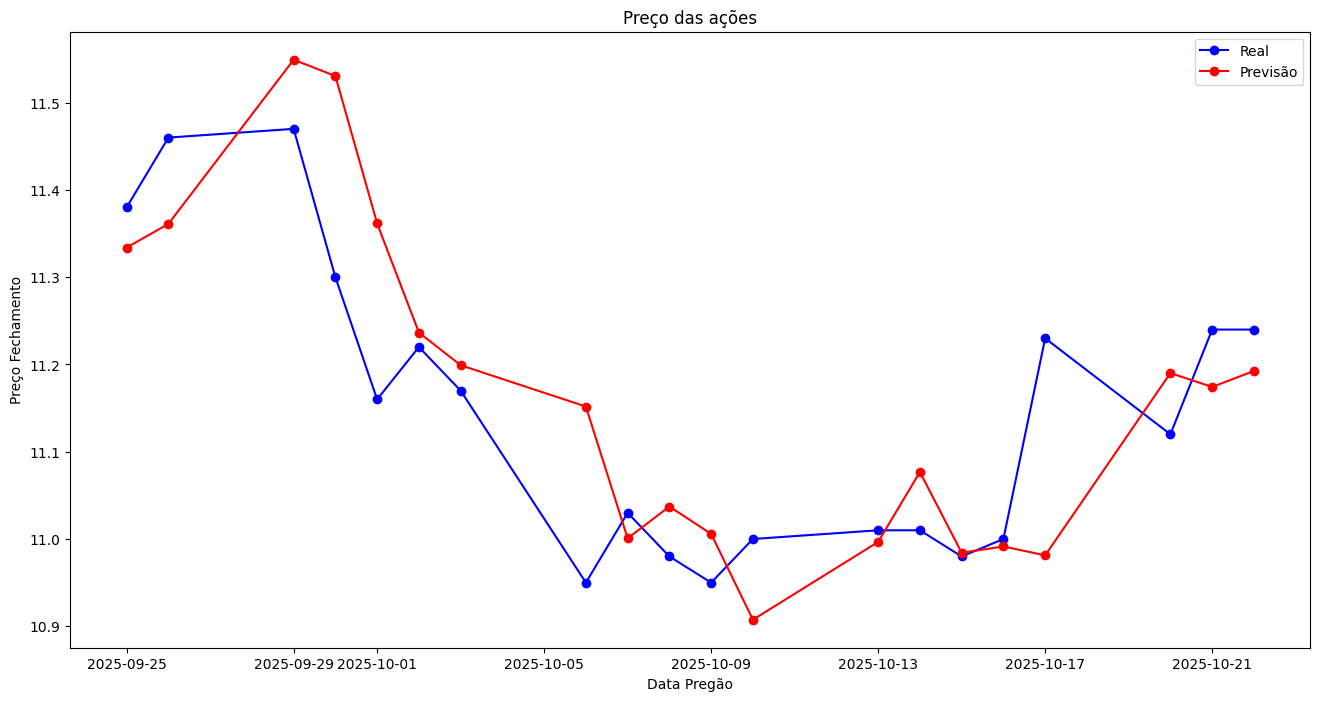

In [41]:
# Gerando o gráfico
plt.figure(figsize=(16, 8))
plt.title('Preço das ações')
plt.plot(df['Real'], label='Real', color= 'blue', marker='o')
plt.plot(df['Previsão'], label = 'Previsão', color='red', marker='o')
plt.xlabel('Data Pregão')
plt.ylabel('Preço Fechamento')
leg = plt.legend()
